This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

01	date			:	Date in MM-DD-YYYY
02	day			:	Day of the Week
03	quarter			:	A portion of the month. A month was divided into four quarters
04	department		:	Associated department with the instance
05	team_no			:	Associated team number with the instance
06	no_of_workers		:	Number of workers in each team
07	no_of_style_change	:	Number of changes in the style of a particular product
08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
09	smv			:	Standard Minute Value, it is the allocated time for a task
10	wip			:	Work in progress. Includes the number of unfinished items for products
11	over_time		:	Represents the amount of overtime by each team in minutes
12	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13	idle_time		:	The amount of time when the production was interrupted due to several reasons
14	idle_men		:	The number of workers who were idle due to production interruption
15	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

In [2]:
data = pd.read_csv("garments_worker.csv")
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
data.isna().sum().sort_values(ascending = False)

,0
wip,506
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
over_time,0
incentive,0


In [5]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

,0
wip,42.272348
date,0.000000
quarter,0.000000
department,0.000000
day,0.000000
team,0.000000
targeted_productivity,0.000000
smv,0.000000
over_time,0.000000
incentive,0.000000


In [7]:
from datetime import datetime
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime("%Y-%m-%d")

In [8]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [9]:
data.describe(include='O')

,date,quarter,department,day
count,1197,1197,1197,1197
unique,59,5,3,6
top,2015-03-11,Quarter1,sweing,Wednesday
freq,24,360,691,208


In [10]:
data['department'].value_counts()

,count
department,
sweing,691
finishing,257
finishing,249


In [11]:
data['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [12]:
data['department'] = data['department'].str.replace("sweing","sewing")
data['department'] = data['department'].str.replace("finishing ","finishing")
data['department'].value_counts()

,count
department,
sewing,691
finishing,506


In [13]:
data[data.duplicated()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [14]:
# The unique values in the data in column

print("Unique values per column")
data.nunique().sort_values()

Unique values per column


,0
department,2
no_of_style_change,3
quarter,5
day,6
targeted_productivity,9
idle_men,10
team,12
idle_time,12
incentive,48
date,59


In [15]:
for i in data.columns:
  print(f"Unique Value in {i}")
  print(data[i].unique(), '\n')

Unique Value in date
['2015-01-01' '2015-01-03' '2015-01-04' '2015-01-05' '2015-01-06'
 '2015-01-07' '2015-01-08' '2015-01-10' '2015-01-11' '2015-01-12'
 '2015-01-13' '2015-01-14' '2015-01-15' '2015-01-17' '2015-01-18'
 '2015-01-19' '2015-01-20' '2015-01-21' '2015-01-22' '2015-01-24'
 '2015-01-25' '2015-01-26' '2015-01-27' '2015-01-28' '2015-01-29'
 '2015-01-31' '2015-02-01' '2015-02-02' '2015-02-03' '2015-02-04'
 '2015-02-05' '2015-02-07' '2015-02-08' '2015-02-09' '2015-02-10'
 '2015-02-11' '2015-02-12' '2015-02-14' '2015-02-15' '2015-02-16'
 '2015-02-17' '2015-02-18' '2015-02-19' '2015-02-22' '2015-02-23'
 '2015-02-24' '2015-02-25' '2015-02-26' '2015-02-28' '2015-03-01'
 '2015-03-02' '2015-03-03' '2015-03-04' '2015-03-05' '2015-03-07'
 '2015-03-08' '2015-03-09' '2015-03-10' '2015-03-11'] 

Unique Value in quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5'] 

Unique Value in department
['sewing' 'finishing'] 

Unique Value in day
['Thursday' 'Saturday' 'Sunday' 'Monday' '

In [16]:
data['wip'] = data['wip'].fillna(data['wip'].median())

In [17]:
data.isna().sum().sum()

0

In [30]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
print('No. of numerical feature: ',len(numerical_feature))
data[numerical_feature]

No. of numerical feature:  11


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [24]:
# Productivity Benchmarking - Management wants to set a realistic productivity benchmark.

data.groupby(['department', 'quarter'])[['actual_productivity', 'targeted_productivity']].mean()

actual_productivity  targeted_productivity
department quarter                                             
finishing  Quarter1             0.758482               0.747315
           Quarter2             0.764824               0.738435
           Quarter3             0.735793               0.741358
           Quarter4             0.713400               0.721759
           Quarter5             0.900174               0.723810
sewing     Quarter1             0.746671               0.741801
           Quarter2             0.727200               0.727128
           Quarter3             0.685272               0.708527
           Quarter4             0.705725               0.708929
           Quarter5             0.758615               0.713043

Quarter 5 saw a significant productivity boost in Finishing, suggesting possible process improvements, increased efficiency, or external factors influencing output.



In [31]:
# Bottleneck Identification - The production team wants to identify bottlenecks affecting productivity.

data[numerical_feature].corr()['actual_productivity'].sort_values()

,actual_productivity
no_of_style_change,-0.207366
idle_men,-0.181734
team,-0.148753
smv,-0.122089
idle_time,-0.080851
no_of_workers,-0.057991
over_time,-0.054206
incentive,0.076538
wip,0.083545
targeted_productivity,0.421594


In [33]:
# Low Productivity Days - Management wants to predict which days of the week have lower productivity.

data.groupby('day')['actual_productivity'].mean().sort_values()

,actual_productivity
day,
Thursday,0.722641
Sunday,0.728604
Wednesday,0.730462
Monday,0.735488
Tuesday,0.742701
Saturday,0.751929


In [34]:
# Analyzing Impact of Overtime and Incentives

data[['over_time','incentive','actual_productivity']].corr()

,over_time,incentive,actual_productivity
over_time,1.000000,-0.004793,-0.054206
incentive,-0.004793,1.000000,0.076538
actual_productivity,-0.054206,0.076538,1.000000


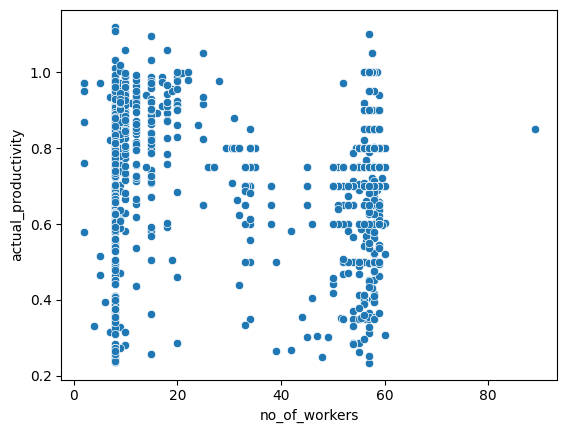

In [36]:
 # Worker Efficiency Study

sns.scatterplot(x=data['no_of_workers'],y=data['actual_productivity'])
plt.show()

In [37]:
# WIP (Work-in-Progress) Management

data.groupby('team')[['wip', 'actual_productivity']].mean().sort_values(by='wip', ascending=False)

,wip,actual_productivity
team,,
1,1343.104762,0.821054
10,1317.920000,0.719736
3,1265.073684,0.803880
2,1189.229358,0.770855
9,1175.480769,0.734462
12,1170.656566,0.779055
4,1139.961905,0.770035
7,1016.375000,0.668006
8,1010.935780,0.674148


<Axes: xlabel='month'>

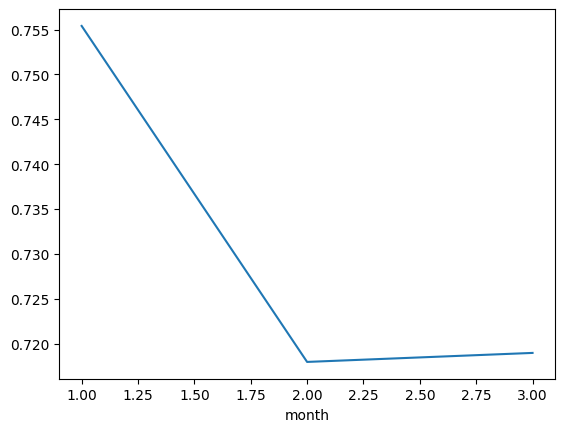

In [39]:
# Seasonality and Productivity Trends

data['date'] = pd.to_datetime(data['date'])  # Convert date column
data['month'] = data['date'].dt.month
data.groupby('month')['actual_productivity'].mean().plot(kind='line')